<a href="https://colab.research.google.com/github/ppatriciasy/ml-student_scores-prediction/blob/main/Assignment_AI_Supervised_Regression_StudentScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Scores Prediction with Machine Learning**
Linear Regression, Decision Tree and Random Forest.



In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import dataset student score
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **1. Exploratory Data Analysis**

In [4]:
# Provides some information regarding the columns in the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
# This describes the basic stat behind the dataset used
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Figure size 1200x600 with 0 Axes>

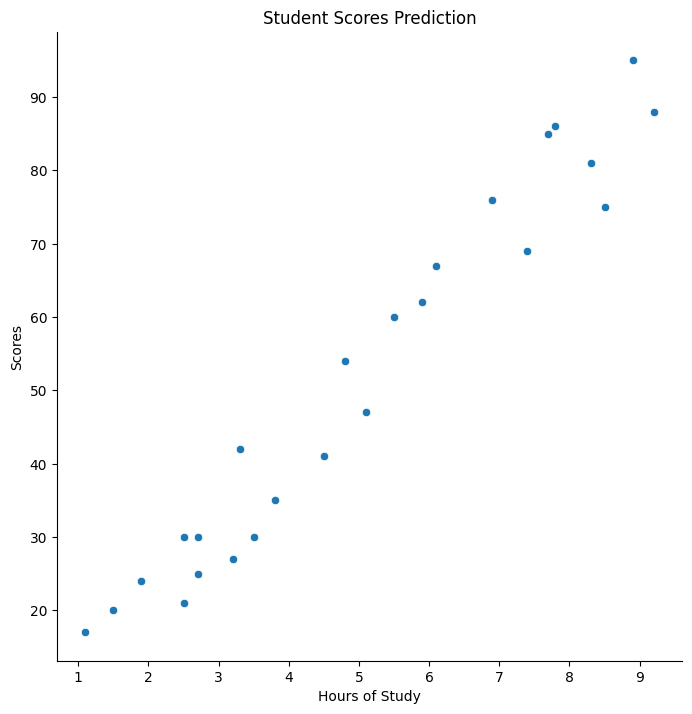

In [45]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'],height=7,kind='scatter')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Student Scores Prediction')
plt.show()

The scatter plot shows a positive relationship between study hours and students' exam scores. The X-axis represents study hours, while the Y-axis shows the exam scores. Each point represents a student, and the pattern indicates that the more time spent studying, the higher the potential score.

# **2.  Feature Engineering**
*   Check Duplicated Data
*   Handling Missing Value
*   Outlier Analysis








In [7]:
df = dataset.copy()

In [8]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [9]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [10]:
df = df.drop_duplicates()

In [11]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


There's no duplicate data found.

In [12]:
# Handling Missing Value
df.isna().sum()

,0
Hours,0
Scores,0


There's no missing value.

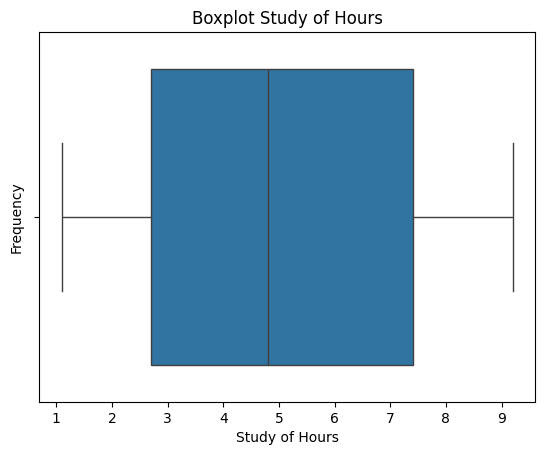

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

plt.xlabel("Study of Hours")
plt.ylabel("Frequency")
plt.title("Boxplot Study of Hours")

# Show plot
plt.show()

There's no outlier value

# **3. Modelling Machine Learning Regression**


In [16]:
# Study Hours data
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
# Scores data
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [18]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [19]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=42)

In [22]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [21]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


# *Linear Regression*

In [23]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [24]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [25]:
#array
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [26]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [27]:
y_train

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [28]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62


In [29]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [31]:
y_train

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [32]:
# Predicting the Scores for the Test values
y_pred = lr_model.predict(X_test)

In [33]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [34]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

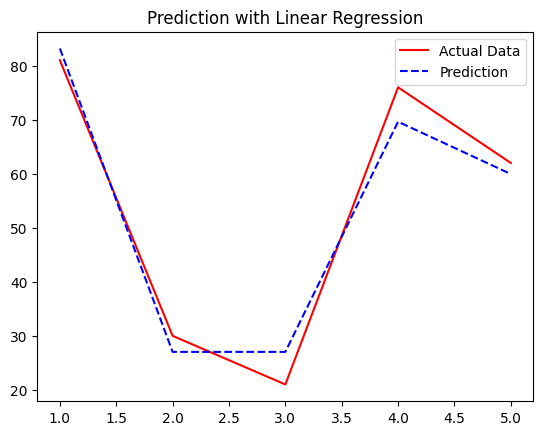

In [35]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

This plot illustrates the prediction results using linear regression, showing that the model's predictions closely follow the actual data, with some variations at certain points.

# **4. Model Evaluation**

In [36]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [38]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9678055545167994


In [39]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.826892353899737
Coefficient of the line Linear Regression: [9.68207815]


In [40]:
# x_test = 8.0
# y = 2.48 + 9.71 * 8.0

nilai_y = 2.48 + 9.71 * 8.0
print('nilai y : ', nilai_y )

nilai y :  80.16000000000001


Then it is said to form a line with result in Linear Regression

# y = 2.48 + 9.71 x

with x is the value of study hours

# *Decision Tree Regressor*

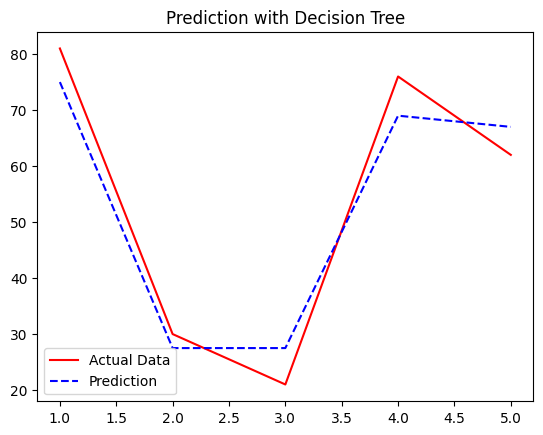

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test)

# View data
y_pred_dt
y_test
X_test

# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

This plot illustrates the prediction results using Decision Tree.

In [42]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.9461250849762066


# *Random Forest Regressor*

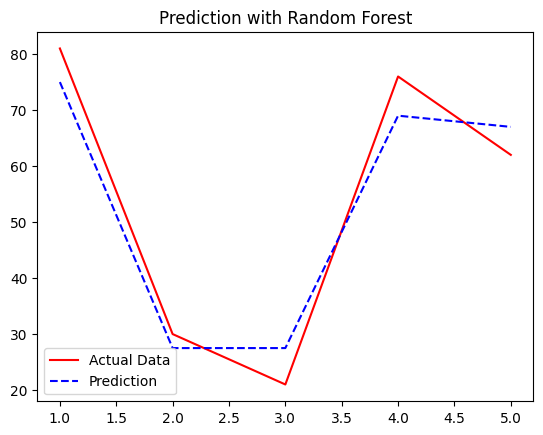

In [43]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# View data
y_pred_rf
y_test
X_test

# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

This plot illustrates the prediction results using Random Forest.

In [44]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

print('r square Random Forest Results:',rsq_rf)

r square Random Forest Results: 0.9810204278079916


# **5. Conclusion**
Here are the results of r square (R²):
```
Linear Regression = 0.967
Decision Tree = 0.946
Random Forest = 0.981
```
The analysis results indicate that the Random Forest model achieved the highest performance (R² = 0.981), outperforming Linear Regression (R² = 0.967) and Decision Tree (R² = 0.946). This suggests that Random Forest is the most accurate model, as it better captures data variability compared to the others. Therefore, Random Forest is recommended as the optimal model for predicting student scores based on study hours.


